# 使用可变的学习率

In [1]:
import torch
from torch import nn
import d2l.torch as d2l
import matplotlib.pyplot as plt
d2l.use_svg_display()

In [2]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(1,1)
    def forward(self, X):
        pass

In [3]:
net = MyModule()
learning_rate = 1
trainer = torch.optim.SGD(net.parameters(), learning_rate)

使用一个余弦退火函数, 这里指的一个 $T\_max$ 是 $\pi$

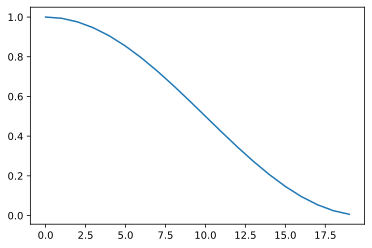

In [4]:
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(trainer, T_max=20)
List = []
for i in range(20):
    trainer.zero_grad()
    trainer.step()
    List.append(trainer.param_groups[0]['lr'])
    scheduler.step()
_ = plt.plot(range(20), List)

每隔 $step\_size$ 将学习率乘上 $\gamma$

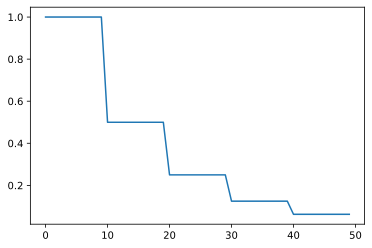

In [6]:
learning_rate = 1
trainer = torch.optim.SGD(net.parameters(), learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(trainer, step_size=10, gamma=0.5)
List.clear()
for i in range(50):
    trainer.zero_grad()
    trainer.step()
    List.append(trainer.param_groups[0]['lr'])
    scheduler.step()
_ = plt.plot(range(50), List)